In [36]:
# pandas
%pip install pandas
import pandas as pd

# seaborn
%pip install seaborn
import seaborn as sns

# matplotlib
%pip install matplotlib
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [37]:
# Representing data in a dataframe
df = pd.read_csv('dataset.csv')
df

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,...,ObjStm,JS,OBS_JS,Javascript,OBS_Javascript,OpenAction,OBS_OpenAction,Acroform,OBS_Acroform,class
0,644.326,70,0,1,348,351,128,128,1,1,...,0,1,0,1,0,1,0,1,0,1
1,648.050,68,0,1,348,345,124,124,1,1,...,0,1,0,1,0,0,0,1,0,1
2,696.506,68,0,1,353,353,128,125,1,1,...,0,1,0,1,0,0,0,1,0,1
3,715.926,68,0,0,759,667,250,192,1,1,...,0,1,0,1,0,1,0,1,0,1
4,707.102,70,10,2,388,373,141,138,1,1,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,49.000,1,19,0,9,6,3,2,1,1,...,0,0,0,0,0,0,0,2,0,0
499996,43.000,1,24,0,98,83,3,2,2,2,...,0,0,0,0,0,0,0,0,0,0
499997,83.000,1,0,0,13,11,3,3,1,1,...,0,0,0,0,0,0,0,2,0,0
499998,24.000,1,22,1,13,6,2,3,1,1,...,0,1,0,0,0,0,0,2,0,0


In [38]:
# Print some statistics
df.describe()

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,...,ObjStm,JS,OBS_JS,Javascript,OBS_Javascript,OpenAction,OBS_OpenAction,Acroform,OBS_Acroform,class
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,500000.0,500000.000000,500000.0,500000.000000,500000.0,500000.000000,500000.0,500000.0
mean,563.363772,55.101686,5.617004,1.041594,273.595072,273.472290,95.115512,95.331500,0.969714,1.001358,...,0.008572,0.873134,0.0,0.795662,0.0,0.436600,0.0,0.887564,0.0,0.9
std,280.213763,30.233062,6.501397,0.734654,142.333280,142.734185,51.683914,52.094421,0.263349,0.244811,...,0.198168,0.547981,0.0,0.416932,0.0,0.495965,0.0,0.519314,0.0,0.3
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
25%,585.864250,67.000000,0.000000,1.000000,266.000000,266.000000,85.000000,87.000000,1.000000,1.000000,...,0.000000,1.000000,0.0,1.000000,0.0,0.000000,0.0,1.000000,0.0,1.0
50%,657.841000,68.000000,4.000000,1.000000,346.000000,345.000000,123.000000,122.000000,1.000000,1.000000,...,0.000000,1.000000,0.0,1.000000,0.0,0.000000,0.0,1.000000,0.0,1.0
75%,708.503250,69.000000,9.000000,2.000000,355.000000,354.000000,126.000000,126.000000,1.000000,1.000000,...,0.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.0
max,1761.042000,287.000000,267.000000,18.000000,760.000000,760.000000,254.000000,254.000000,3.000000,3.000000,...,15.000000,3.000000,0.0,5.000000,0.0,1.000000,0.0,2.000000,0.0,1.0


In [39]:
# Check for missing values
df.isnull().sum()

pdfsize             0
pages               0
title characters    0
images              0
obj                 0
endobj              0
stream              0
endstream           0
xref                0
trailer             0
startxref           0
ObjStm              0
JS                  0
OBS_JS              0
Javascript          0
OBS_Javascript      0
OpenAction          0
OBS_OpenAction      0
Acroform            0
OBS_Acroform        0
class               0
dtype: int64

<Axes: xlabel='class', ylabel='count'>

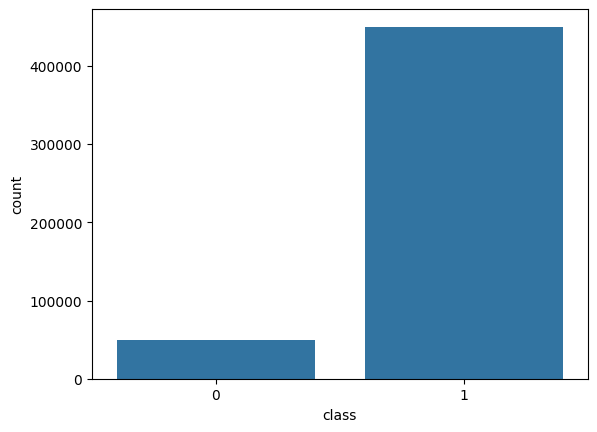

In [40]:
# plot the number of class=1 and class=0
sns.countplot(x='class', data=df)

In [41]:
# Split the data into features and target
x = df.drop('class', axis=1)
y = df['class']

In [42]:
# ML algorithms
%pip install scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
# Split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=9)

In [44]:
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

In [45]:
# Decision Trees
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

#
cm = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = cm.ravel()

results = pd.DataFrame({
    'Metric': ['True Positives (TP)', 'True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)'],
    'Value': [TP, TN, FP, FN]
})

accuracy_scores['Decision Trees'] = accuracy_score(y_test, y_pred)
precision_scores['Decision Trees'] = TP/(TP+FP)
recall_scores['Decision Trees'] = TP/(TP+FN)
f1_scores['Decision Trees'] = cross_val_score(dt, x, y, cv=5, scoring='f1').mean()

print('Decision Trees Accuracy:', accuracy_scores['Decision Trees'], end="\n")
print('Decision Trees Confusion Matrix:\n', results, end="\n")
print('Decision Trees Classification Report:\n', classification_report(y_test, y_pred), end="\n")
print('Decision Trees F1 Score:', f1_scores['Decision Trees'], end="\n")

Decision Trees Accuracy: 0.998664
Decision Trees Confusion Matrix:
                  Metric   Value
0   True Positives (TP)  112421
1   True Negatives (TN)   12412
2  False Positives (FP)      79
3  False Negatives (FN)      88
Decision Trees Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     12491
           1       1.00      1.00      1.00    112509

    accuracy                           1.00    125000
   macro avg       1.00      1.00      1.00    125000
weighted avg       1.00      1.00      1.00    125000

Decision Trees F1 Score: 0.9992610948328242


In [46]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, and FN
TN, FP, FN, TP = cm.ravel()

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['True Positives (TP)', 'True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)'],
    'Value': [TP, TN, FP, FN]
})

accuracy_scores['Random Forest'] = accuracy_score(y_test, y_pred)
precision_scores['Random Forest'] = TP/(TP+FP)
recall_scores['Random Forest'] = TP/(TP+FN)
f1_scores['Random Forest'] = cross_val_score(rf, x, y, cv=5, scoring='f1').mean()

print('Random Forest Accuracy:', accuracy_scores['Random Forest'], end="\n")
print('Random Forest Confusion Matrix: \n', results, end="\n")
print('Random Forest Classification Report: \n', classification_report(y_test, y_pred), end="\n")
print('Random Forest F1 Score:', f1_scores['Random Forest'], end="\n")


Random Forest Accuracy: 0.99944
Random Forest Confusion Matrix: 
                  Metric   Value
0   True Positives (TP)  112484
1   True Negatives (TN)   12446
2  False Positives (FP)      45
3  False Negatives (FN)      25
Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12491
           1       1.00      1.00      1.00    112509

    accuracy                           1.00    125000
   macro avg       1.00      1.00      1.00    125000
weighted avg       1.00      1.00      1.00    125000

Random Forest F1 Score: 0.9996589173243431


In [47]:
# Logistic Regression
lr = LogisticRegression(max_iter=5000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
results = pd.DataFrame({
    'Metric': ['True Positives (TP)', 'True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)'],
    'Value': [TP, TN, FP, FN]
})

accuracy_scores['Logistic Regression'] = accuracy_score(y_test, y_pred)
precision_scores['Logistic Regression'] = TP/(TP+FP)
recall_scores['Logistic Regression'] = TP/(TP+FN)
f1_scores['Logistic Regression'] = cross_val_score(lr, x, y, cv=5, scoring='f1').mean()

print('Logistic Regression Accuracy:', accuracy_scores['Logistic Regression'], end="\n")
print('Logistic Regression Confusion Matrix: \n', results, end="\n")
print('Logistic Regression Classification Report: \n', classification_report(y_test, y_pred), end="\n")
print('Logistic Regression F1 Score:', f1_scores['Logistic Regression'], end="\n")

Logistic Regression Accuracy: 0.991536
Logistic Regression Confusion Matrix: 
                  Metric   Value
0   True Positives (TP)  111979
1   True Negatives (TN)   11963
2  False Positives (FP)     528
3  False Negatives (FN)     530
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     12491
           1       1.00      1.00      1.00    112509

    accuracy                           0.99    125000
   macro avg       0.98      0.98      0.98    125000
weighted avg       0.99      0.99      0.99    125000

Logistic Regression F1 Score: 0.9950709511054153


In [48]:
# Support Vector Machine
svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
results = pd.DataFrame({
    'Metric': ['True Positives (TP)', 'True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)'],
    'Value': [TP, TN, FP, FN]
})

accuracy_scores['Support Vector Machine'] = accuracy_score(y_test, y_pred)
precision_scores['Support Vector Machine'] = TP/(TP+FP)
recall_scores['Support Vector Machine'] = TP/(TP+FN)
f1_scores['Support Vector Machine'] = cross_val_score(svm, x, y, cv=5, scoring='f1').mean()

print('SVM Accuracy:', accuracy_scores['Support Vector Machine'])
print('SVM Confusion Matrix: \n', results)
print('SVM Classification Report: \n', classification_report(y_test, y_pred))
print('SVM F1 Score:', f1_scores['Support Vector Machine'])

In [49]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
results = pd.DataFrame({
    'Metric': ['True Positives (TP)', 'True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)'],
    'Value': [TP, TN, FP, FN]
})

accuracy_scores['K-Nearest Neighbors'] = accuracy_score(y_test, y_pred)
precision_scores['K-Nearest Neighbors'] = TP/(TP+FP)
recall_scores['K-Nearest Neighbors'] = TP/(TP+FN)
f1_scores['K-Nearest Neighbors'] = cross_val_score(knn, x, y, cv=5, scoring='f1').mean()

print('K-Nearest Neighbors Accuracy:', accuracy_scores['K-Nearest Neighbors'])
print('K-Nearest Neighbors Confusion Matrix: \n', results)
print('K-Nearest Neighbors Classification Report: \n', classification_report(y_test, y_pred))
print('K-Nearest Neighbors F1 Score:', f1_scores['K-Nearest Neighbors'])


K-Nearest Neighbors Accuracy: 0.993016
K-Nearest Neighbors Confusion Matrix: 
                  Metric   Value
0   True Positives (TP)  111854
1   True Negatives (TN)   12273
2  False Positives (FP)     218
3  False Negatives (FN)     655
K-Nearest Neighbors Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     12491
           1       1.00      0.99      1.00    112509

    accuracy                           0.99    125000
   macro avg       0.97      0.99      0.98    125000
weighted avg       0.99      0.99      0.99    125000

K-Nearest Neighbors F1 Score: 0.9962143689198399


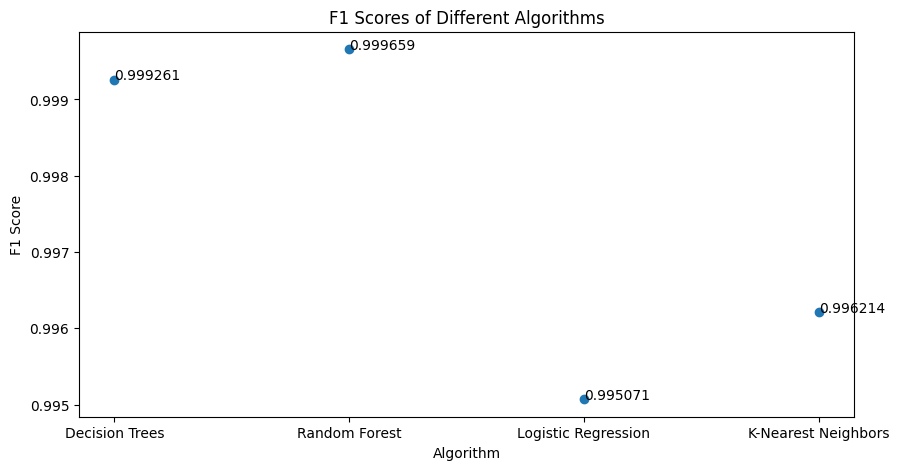

In [50]:
#F-1 Scores of Different Algorithms

plt.figure(figsize=(10,5))
plt.scatter(f1_scores.keys(), f1_scores.values())
for algorithm, score in zip(f1_scores.keys() , f1_scores.values()):
    plt.text(algorithm, score, str(round(score,6)))
plt.xlabel('Algorithm')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Different Algorithms')
plt.show()

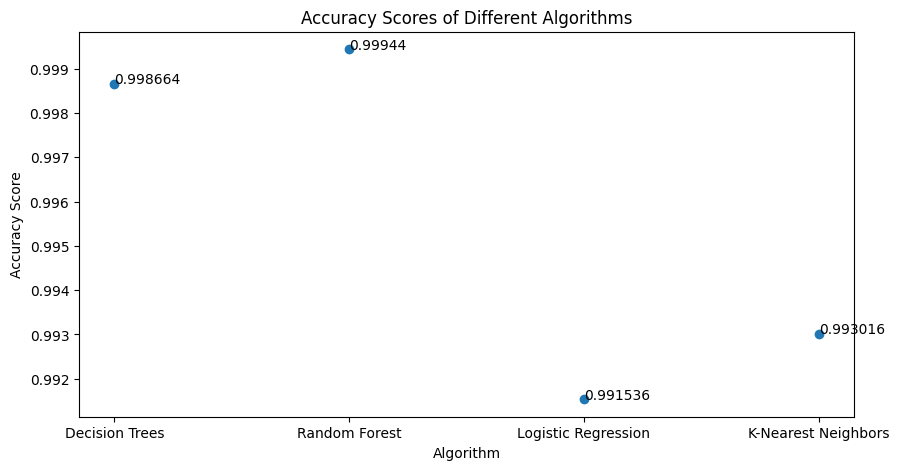

In [51]:
# Accuracy of Different Algorithms

plt.figure(figsize=(10,5))
plt.scatter(accuracy_scores.keys(), accuracy_scores.values())
for algorithm, score in zip(accuracy_scores.keys() , accuracy_scores.values()):
    plt.text(algorithm, score, str(round(score,6)))
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Algorithms')
plt.show()

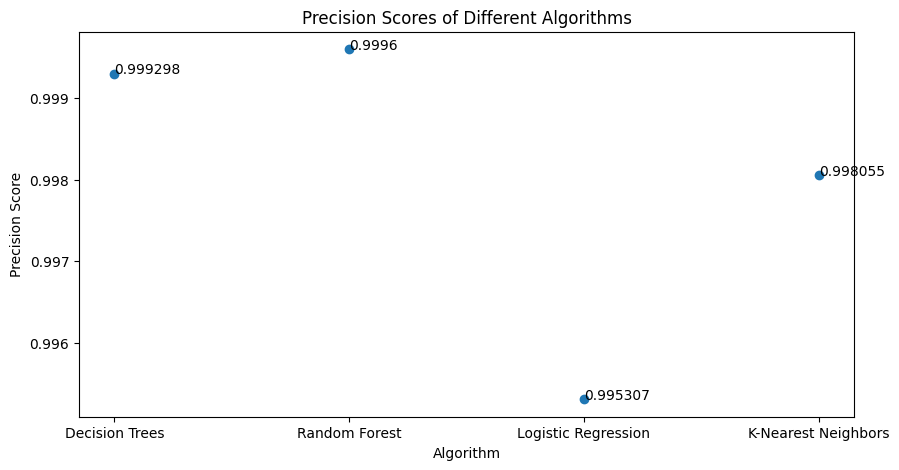

In [52]:
# Precision of Different Algorithms

plt.figure(figsize=(10,5))
plt.scatter(precision_scores.keys(), precision_scores.values())
for algorithm, score in zip(precision_scores.keys() , precision_scores.values()):
    plt.text(algorithm, score, str(round(score,6)))
plt.xlabel('Algorithm')
plt.ylabel('Precision Score')
plt.title('Precision Scores of Different Algorithms')
plt.show()

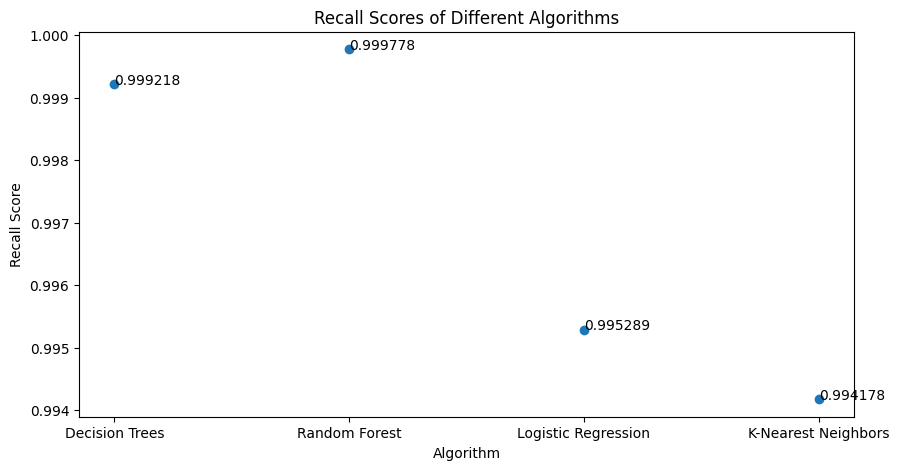

In [53]:
# Recall of Different Algorithms

plt.figure(figsize=(10,5))
plt.scatter(recall_scores.keys(), recall_scores.values())
for algorithm, score in zip(recall_scores.keys() , recall_scores.values()):
    plt.text(algorithm, score, str(round(score,6)))
plt.xlabel('Algorithm')
plt.ylabel('Recall Score')
plt.title('Recall Scores of Different Algorithms')
plt.show()